# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

# 🎓 Student Dropout Prediction - Jaya Jaya Institut

Proyek ini merupakan inisiatif analisis dan prediksi **dropout mahasiswa** pada institusi pendidikan tinggi **Jaya Jaya Institut**. Dengan pendekatan **data science dan machine learning**, proyek ini bertujuan membantu pihak kampus dalam:

* Mengidentifikasi mahasiswa yang berisiko tinggi putus studi (dropout).
* Memahami faktor-faktor yang memengaruhi keberhasilan akademik.
* Memberikan insight bagi kebijakan akademik dan layanan mahasiswa.

---

## Persiapan

### 📄 Sumber Data

Dataset yang digunakan untuk proyek ini berasal dari repositori publik Dicoding. Dataset ini berisi beragam informasi terkait data demografis, sosio-ekonomi, dan akademik mahasiswa. Fitur-fitur utama mencakup detail pendaftaran (mode aplikasi, urutan pendaftaran, program studi), kualifikasi sebelumnya, informasi keluarga (kualifikasi dan pekerjaan orang tua), status beasiswa, kebutuhan khusus pendidikan, status finansial (tunggakan, biaya kuliah), serta performa akademik per semester (jumlah unit kurikuler yang diambil, dievaluasi, diluluskan, dan nilai). Variabel target adalah status akhir mahasiswa, yang mengindikasikan apakah mahasiswa tersebut **Dropout**, **Lulus** (Graduate), atau masih **Terdaftar** (Enrolled) – dalam kasus data `data.csv` Anda, ini direpresentasikan oleh kolom `Status` (kemungkinan 0 untuk Dropout dan 1 untuk Lulus).

Data ini sangat krusial untuk menganalisis pola dan faktor-faktor yang mempengaruhi keputusan mahasiswa untuk melanjutkan atau menghentikan studi, serta untuk membangun model prediktif guna mengidentifikasi mahasiswa yang berisiko dropout.

📎 Link Dataset (Sumber Asli/Referensi):
[https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv](https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv)

---

### Menyiapkan library yang dibutuhkan

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

### Menyiapkan data yang akan diguankan

# 📊 Business Dashboard - Analisis Dropout Mahasiswa

Dashboard interaktif ini dikembangkan menggunakan **Looker Studio** untuk menganalisis fenomena **dropout mahasiswa** berdasarkan data dari `data_sep.csv`. Tujuan utama dashboard adalah membantu institusi pendidikan memahami faktor-faktor penyebab mahasiswa dropout serta memberikan wawasan yang dapat ditindaklanjuti.

---

## 🔑 Ringkasan Insight & Visualisasi

### 🎯 KPI Utama (Key Performance Indicators):

* **Rata-rata Nilai Semester 1 Mahasiswa Lulus:** 12.64
* **Rata-rata Nilai Semester 1 Mahasiswa Dropout:** 7.26
* **Rata-rata Kelulusan Unit Semester 1 Mahasiswa Lulus:** 13,767
* **Rata-rata Kelulusan Unit Semester 1 Mahasiswa Dropout:** 3,626

### 📊 Visualisasi Distribusi Dropout:

* **Top 5 Program Studi dengan Dropout Tertinggi:**

  1. Biofuel Production Technologies
  2. Informatics
  3. Equiniculture
  4. Management
  5. Basic Education

### 📈 Analisis Performa Akademik:

* **Approved Units vs Enrolled Units Semester 1 & 2:**

  * Mahasiswa **lulus** menyelesaikan lebih banyak unit daripada yang **dropout**.
* **Distribusi Nilai Semester 1 & 2:**

  * Mahasiswa dropout dominan di nilai < 12
  * Mahasiswa lulus dominan di nilai 12–17

### 🎛️ Filter Interaktif:

* **Course Name**
* **Attendance**
* **Gender**

---

## 🔍 Temuan Utama

1. **Tingkat Dropout yang Tinggi pada Program Tertentu**

   * Biofuel Production Technologies mencatat tingkat dropout tertinggi.

2. **Performa Akademik sebagai Prediktor Dropout**

   * Nilai dan jumlah unit yang disetujui pada semester pertama berperan besar.
   * Dropout memiliki nilai rata-rata semester 1 yang rendah (7.26).

3. **Distribusi Nilai dan Kelulusan Unit**

   * Lulusan cenderung memiliki nilai yang stabil dan menyelesaikan lebih banyak unit.

4. **Potensi Segmentasi Berdasarkan Filter Demografis**

   * Dengan filter interaktif, pengguna bisa mengeksplorasi lebih lanjut faktor penyebab dropout berdasarkan gender, attendance, dan program studi.

---

## 🌐 Link Dashboard Interaktif

[Klik untuk membuka dashboard Looker Studio](https://lookerstudio.google.com/reporting/551cbbdc-c372-482f-a128-018b2cdca93e)

---


In [19]:
df = pd.read_csv('data/data.csv',sep= ';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [21]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [22]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
eda_columns = [
    'Status', 'Gender', 'Age_at_enrollment', 'Scholarship_holder', 'Debtor',
    'Admission_grade', 'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date',
    'Unemployment_rate', 'Inflation_rate', 'GDP'
]
df_eda = df[eda_columns]

/tmp/ipykernel_18538/864440841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, x='Status', palette='Set2')


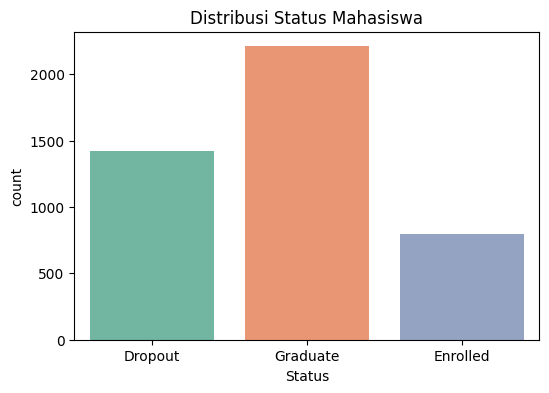

In [25]:
# Distribusi status
plt.figure(figsize=(6, 4))
sns.countplot(data=df_eda, x='Status', palette='Set2')
plt.title('Distribusi Status Mahasiswa')
plt.show()

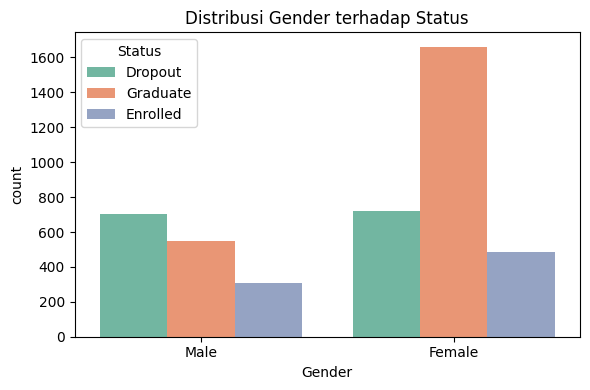

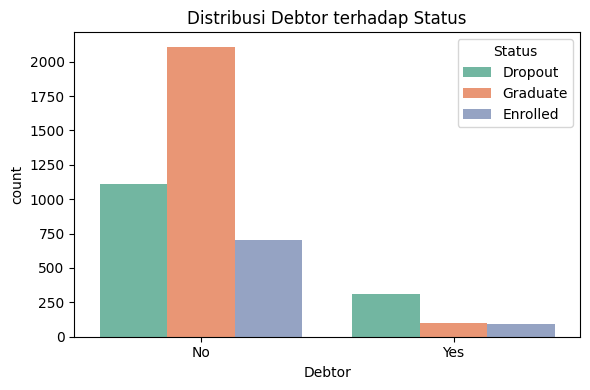

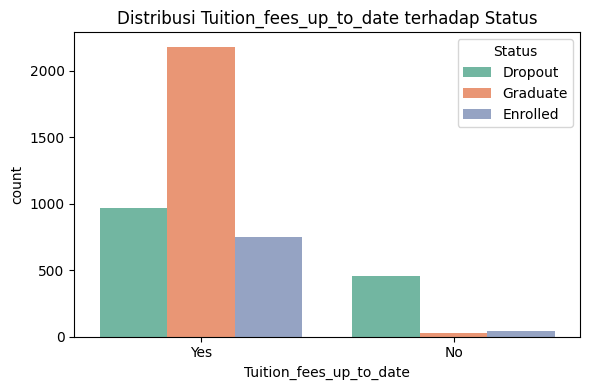

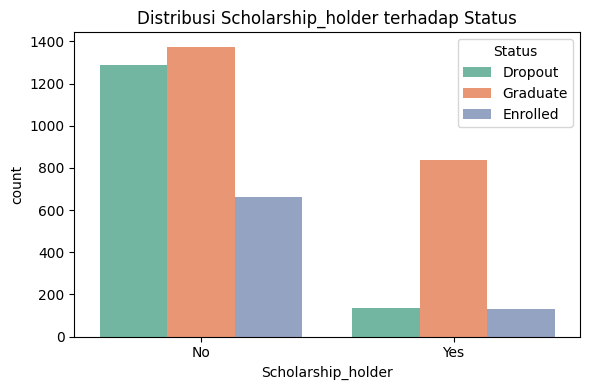

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy dataframe
df_plot = df_eda.copy()

categorical_cols = ['Status','Gender', 'Scholarship_holder', 'Debtor', 'Tuition_fees_up_to_date']
numerical_cols = ['Age_at_enrollment', 'Admission_grade', 'Curricular_units_1st_sem_grade',
                  'Unemployment_rate', 'Inflation_rate', 'GDP']

# Mapping label 0/1 ke string
label_mappings = {
    'Gender': {0: 'Female', 1: 'Male'},
    'Debtor': {0: 'No', 1: 'Yes'},
    'Tuition_fees_up_to_date': {0: 'No', 1: 'Yes'},
    'Scholarship_holder': {0: 'No', 1: 'Yes'}
}

# Apply mapping
for col, mapping in label_mappings.items():
    df_plot[col] = df_plot[col].map(mapping)

# plot mapping
for col in label_mappings.keys():
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_plot, x=col, hue='Status', palette='Set2')
    plt.title(f'Distribusi {col} terhadap Status')
    plt.legend(title='Status')
    plt.tight_layout()
    plt.show()


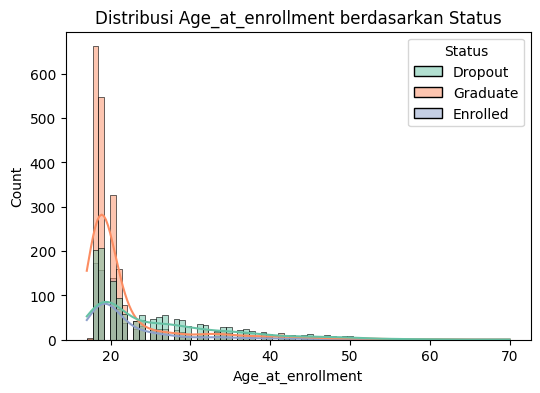

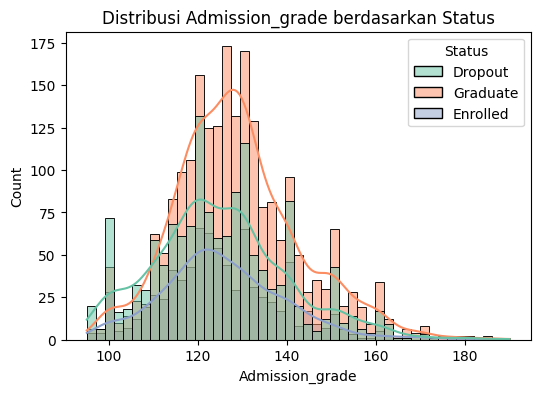

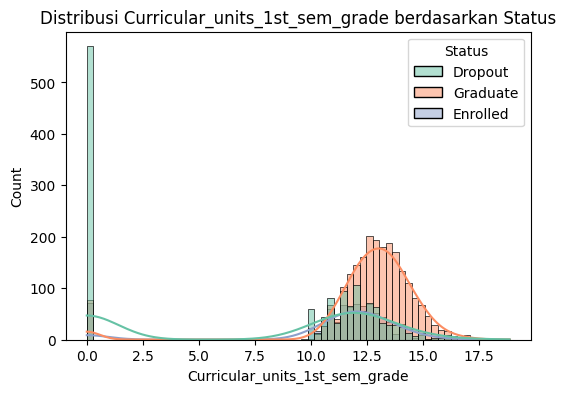

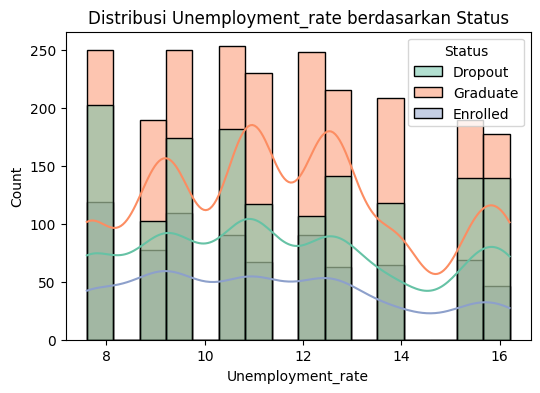

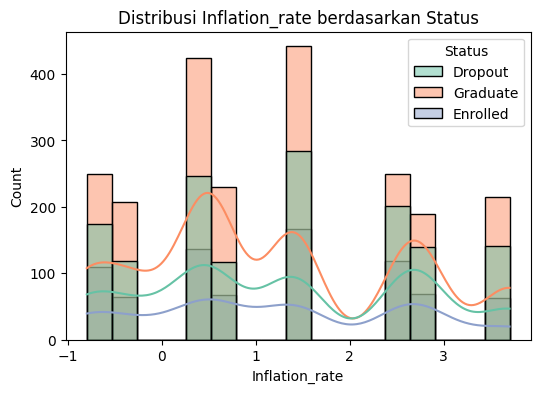

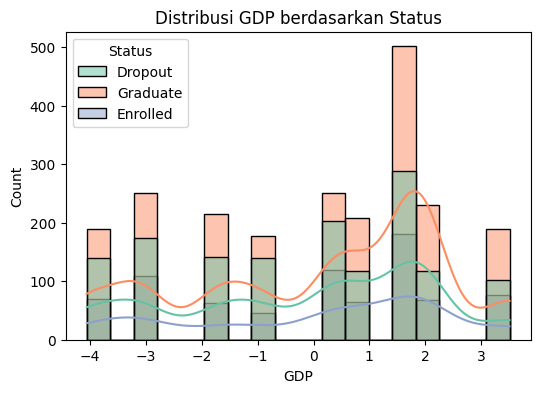

In [27]:
# Distribusi kolom numerik
num_cols = ['Age_at_enrollment', 'Admission_grade', 'Curricular_units_1st_sem_grade',
            'Unemployment_rate', 'Inflation_rate', 'GDP']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_plot, x=col, hue='Status', kde=True, palette='Set2')
    plt.title(f'Distribusi {col} berdasarkan Status')
    plt.show()


/tmp/ipykernel_18538/1887927480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Status', y=col, palette='Set3')


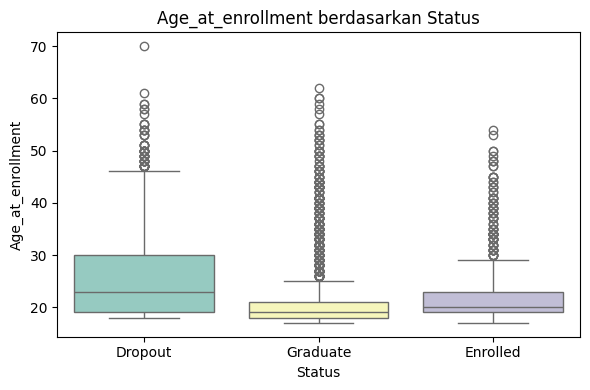

/tmp/ipykernel_18538/1887927480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Status', y=col, palette='Set3')


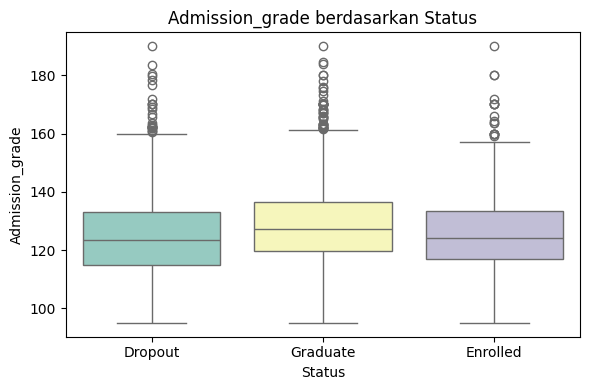

/tmp/ipykernel_18538/1887927480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Status', y=col, palette='Set3')


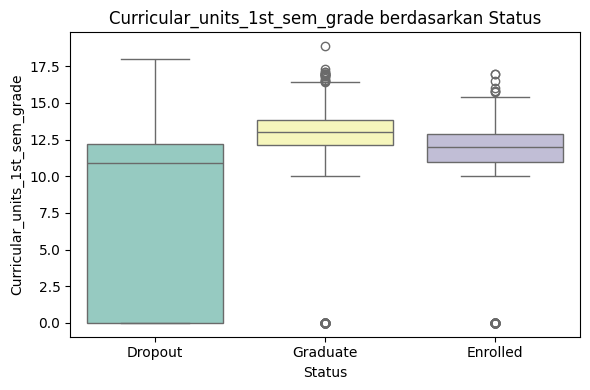

/tmp/ipykernel_18538/1887927480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Status', y=col, palette='Set3')


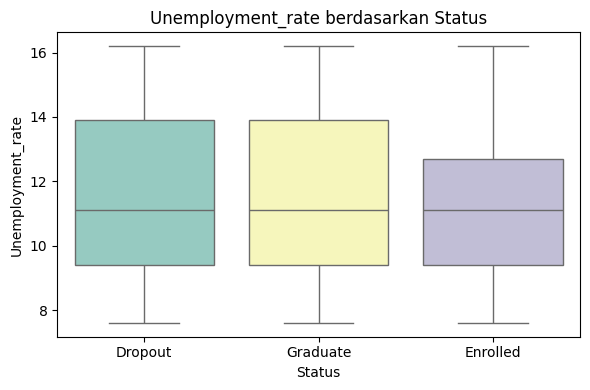

/tmp/ipykernel_18538/1887927480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Status', y=col, palette='Set3')


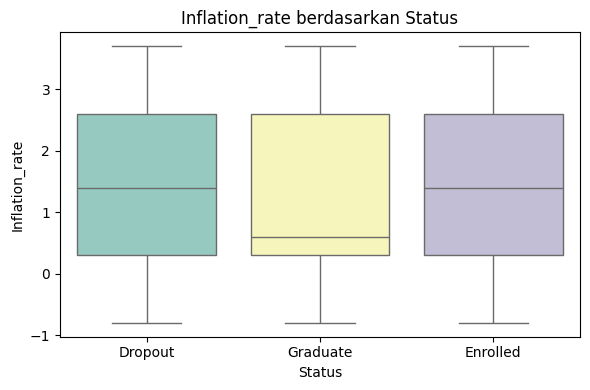

/tmp/ipykernel_18538/1887927480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Status', y=col, palette='Set3')


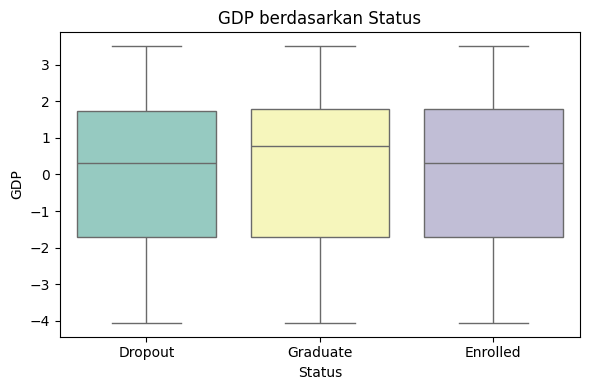

In [28]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_plot, x='Status', y=col, palette='Set3')
    plt.title(f'{col} berdasarkan Status')
    plt.tight_layout()
    plt.show()

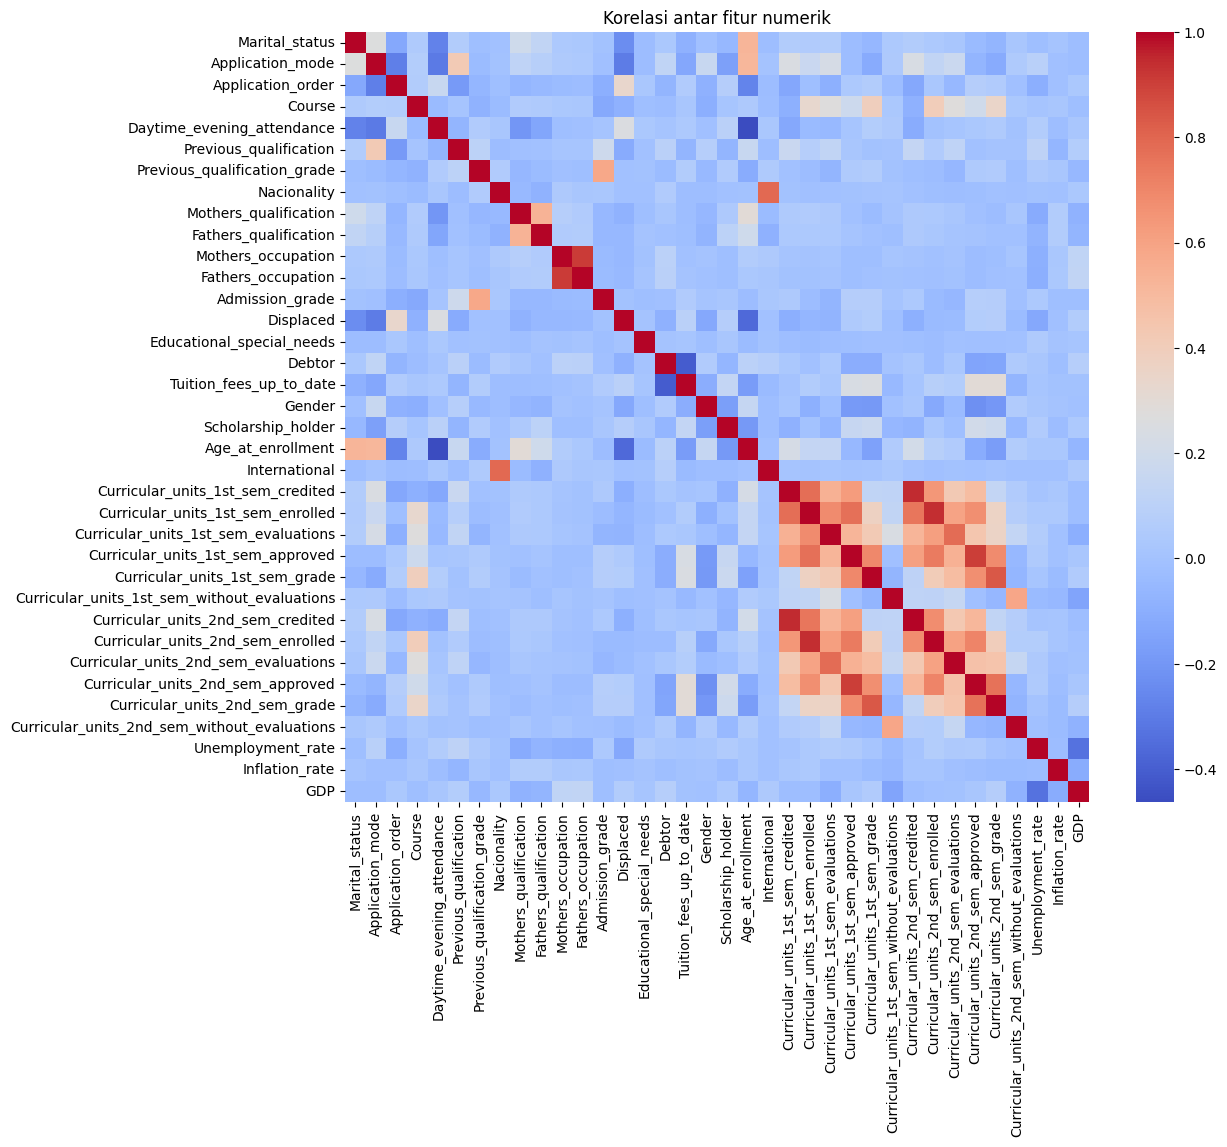

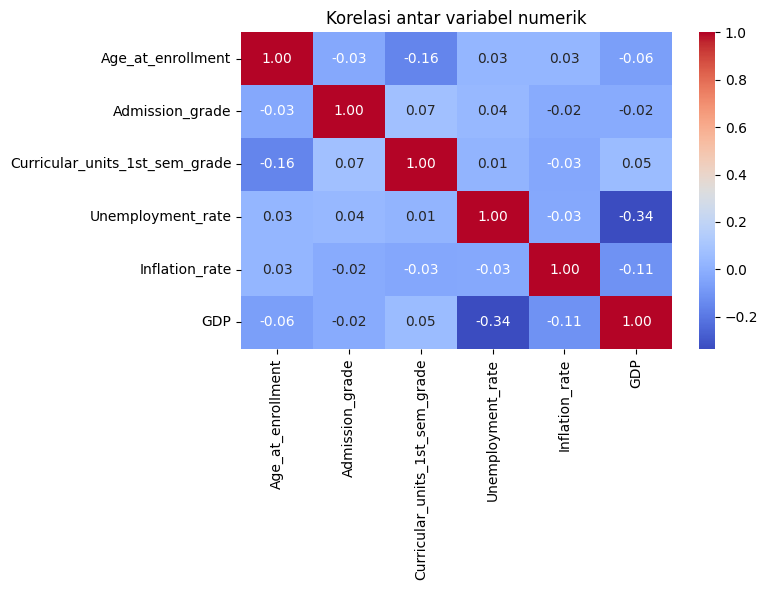

In [29]:
#Korelasi Feature Numerikal

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Korelasi antar fitur numerik")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df_plot[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar variabel numerik')
plt.tight_layout()
plt.show()

In [30]:
df['Gender'].value_counts()
df['Scholarship_holder'].value_counts()

Scholarship_holder
0    3325
1    1099
Name: count, dtype: int64

## Data Preparation / Preprocessing

In [31]:
df = df[df['Status'].isin(['Graduate', 'Dropout'])]
df['Status'] = df['Status'].map({'Dropout': 0, 'Graduate': 1})

df.drop(columns=['Application_order', 'Unemployment_rate', 'Inflation_rate', 'GDP'], inplace=True)

In [32]:
X = df.drop('Status', axis=1)
y = df['Status']
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = ['Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
            'Previous_qualification', 'Nacionality', 'Mothers_qualification',
            'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
            'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
            'Gender', 'Scholarship_holder', 'International']
num_cols = list(set(num_cols) - set(cat_cols))

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


In [33]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Terapkan preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## 🧠 Modeling

### ⚖️ Algoritma yang Digunakan

Model yang digunakan dalam proyek ini adalah:

* **Random Forest Classifier** ✅ *(terbaik)*
* **Logistic Regression**
* **XGBoost Classifier**

In [34]:
# =======================
# 1. Logistic Regression
# =======================
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_processed, y_train)
y_pred_log = logreg.predict(X_test_processed)
print("📘 Logistic Regression:\n", classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test_processed)[:, 1]))


📘 Logistic Regression:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       284
           1       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726

ROC AUC: 0.9481709260085399


In [35]:
# =======================
# 2. Random Forest
# =======================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_processed, y_train)
y_pred_rf = rf.predict(X_test_processed)
print("\n🌲 Random Forest:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_processed)[:, 1]))


🌲 Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88       284
           1       0.89      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726

ROC AUC: 0.9533410872474667


In [36]:
# =======================
# 3. XGBoost
# =======================
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_processed, y_train)
y_pred_xgb = xgb.predict(X_test_processed)
print("\n⚡ XGBoost:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test_processed)[:, 1]))

/media/rapuri/Disk_D/Penerapan_DataScience/Env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:11:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



⚡ XGBoost:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88       284
           1       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726

ROC AUC: 0.9486807724173092


---

## 📈 Evaluasi Model

Berdasarkan hasil evaluasi:

* **Model Terbaik**: Random Forest
* **Akurasi Model**: **95%**
* **Evaluasi Tambahan**:

  * Confusion Matrix
  * Feature Importance

Model ini mampu secara akurat mengidentifikasi mahasiswa yang berisiko dropout berdasarkan atribut seperti status pernikahan, jenis kelamin, mode pendaftaran, nilai masuk, dan lainnya.

---

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       284
           1       0.89      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



/media/rapuri/Disk_D/Penerapan_DataScience/Env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


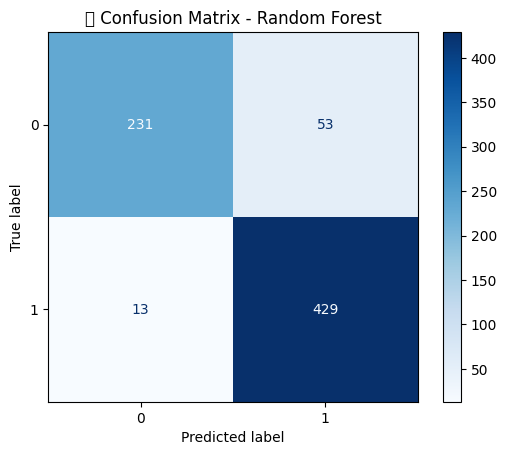

In [37]:
y_pred_rf = rf.predict(X_test_processed)

# Classification report
print("📄 Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title("🧮 Confusion Matrix - Random Forest")
plt.show()

Jumlah nama fitur (setelah transformasi): 221
Jumlah importance dari Random Forest: 230


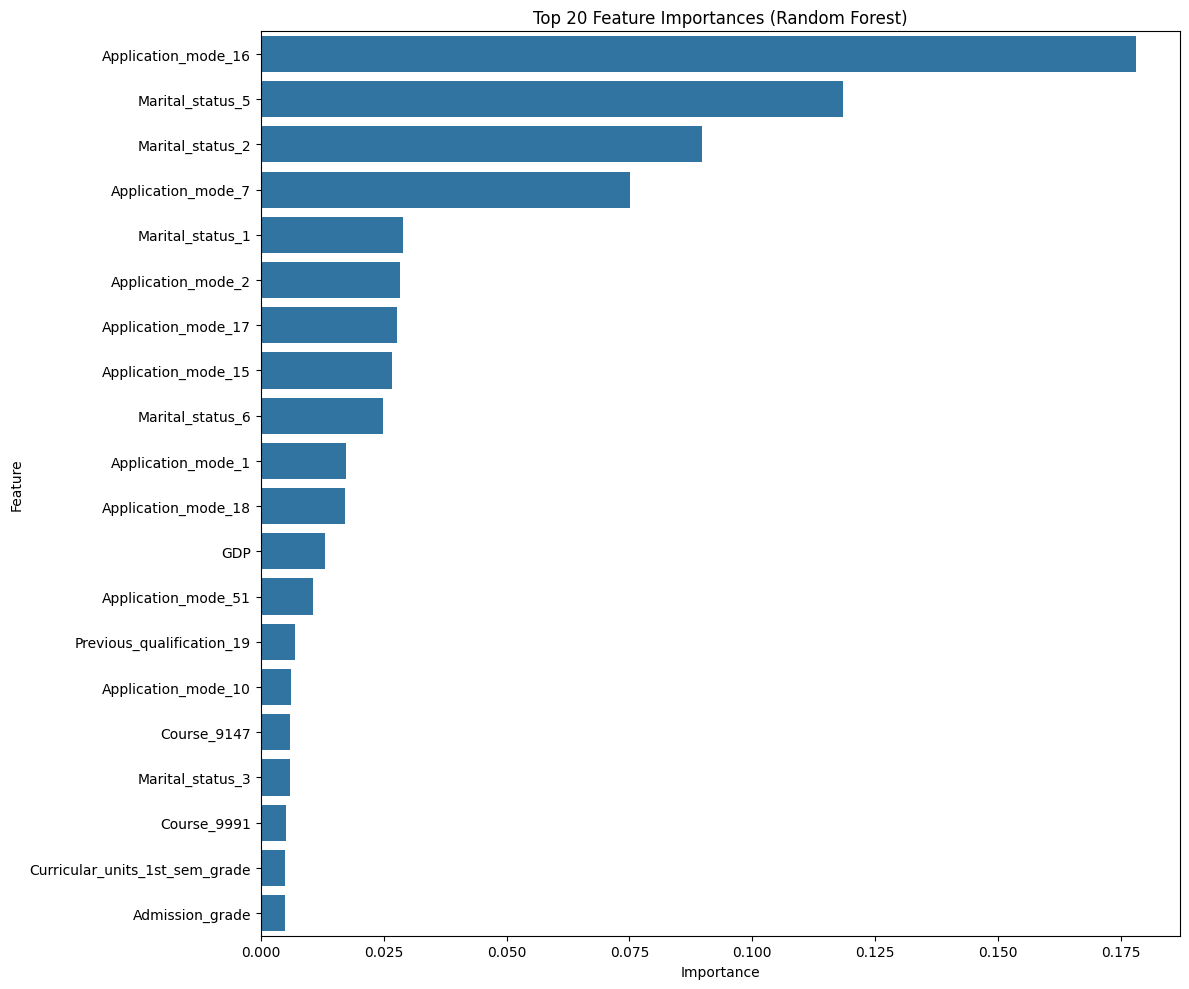

In [38]:
importances = rf.feature_importances_
# 1. Ambil semua nama fitur dari preprocessor (gabungan OHE dan numerik)
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(cat_encoder.feature_names_in_)
all_feature_names = np.concatenate([cat_feature_names, numerical_cols])

# 2. Pastikan panjangnya cocok
print(f"Jumlah nama fitur (setelah transformasi): {len(all_feature_names)}")
print(f"Jumlah importance dari Random Forest: {len(importances)}")

# 3. Jika panjang tidak cocok, potong (biasanya karena kolom target ikut masuk atau ada step lain)
min_len = min(len(all_feature_names), len(importances))
all_feature_names = all_feature_names[:min_len]
importances = importances[:min_len]

# 4. Buat dataframe dan visualisasikan
feat_imp_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Visualisasi
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

In [39]:
import joblib
joblib.dump(rf, "model/random_forest_model.pkl")
joblib.dump(preprocessor, "model/preprocessor.pkl")

print("✅ Model dan preprocessor berhasil disimpan.")

✅ Model dan preprocessor berhasil disimpan.


In [40]:
contoh_data = pd.DataFrame([{
    'Marital_status': 1,
    'Application_mode': 1,
    'Application_order': 1,
    'Course': 33,
    'Daytime_evening_attendance': 1,
    'Previous_qualification': 1,
    'Previous_qualification_grade': 130.0,
    'Nacionality': 1,
    'Mothers_qualification': 1,
    'Fathers_qualification': 1,
    'Mothers_occupation': 3,
    'Fathers_occupation': 3,
    'Admission_grade': 140.0,
    'Displaced': 0,
    'Educational_special_needs': 0,
    'Debtor': 0,
    'Tuition_fees_up_to_date': 1,
    'Gender': 1,
    'Scholarship_holder': 0,
    'Age_at_enrollment': 18,
    'International': 0,
    'Curricular_units_1st_sem_credited': 0,
    'Curricular_units_1st_sem_enrolled': 6,
    'Curricular_units_1st_sem_evaluations': 6,
    'Curricular_units_1st_sem_approved': 6,
    'Curricular_units_1st_sem_grade': 15.0,
    'Curricular_units_1st_sem_without_evaluations': 0,
    'Curricular_units_2nd_sem_credited': 0,
    'Curricular_units_2nd_sem_enrolled': 6,
    'Curricular_units_2nd_sem_evaluations': 6,
    'Curricular_units_2nd_sem_approved': 5,
    'Curricular_units_2nd_sem_grade': 14.0,
    'Curricular_units_2nd_sem_without_evaluations': 0,
    'Unemployment_rate': 10.0,
    'Inflation_rate': 1.2,
    'GDP': 2.1
}])

In [41]:
loaded_model = joblib.load("model/random_forest_model.pkl")
loaded_preprocessor = joblib.load("model/preprocessor.pkl")

# Preprocessing pada data baru
X_contoh_transformed = loaded_preprocessor.transform(contoh_data)

# Prediksi
prediksi = loaded_model.predict(X_contoh_transformed)
probabilitas = loaded_model.predict_proba(X_contoh_transformed)

# Interpretasi hasil
label = "Graduate" if prediksi[0] == 1 else "Dropout"
confidence = round(float(probabilitas[0][prediksi[0]] * 100), 2)

print(f"📌 Prediksi: {label} ({confidence}% confidence)")


📌 Prediksi: Graduate (93.0% confidence)


# 🎓 Student Dropout Prediction - Jaya Jaya Institut

Proyek ini merupakan inisiatif analisis dan prediksi **dropout mahasiswa** pada institusi pendidikan tinggi **Jaya Jaya Institut**. Dengan pendekatan **data science dan machine learning**, proyek ini bertujuan membantu pihak kampus dalam:

* Mengidentifikasi mahasiswa yang berisiko tinggi putus studi (dropout).
* Memahami faktor-faktor yang memengaruhi keberhasilan akademik.
* Memberikan insight bagi kebijakan akademik dan layanan mahasiswa.

---

## 🧠 Modeling

### ⚖️ Algoritma yang Digunakan

Model yang digunakan dalam proyek ini adalah:

* **Random Forest Classifier** ✅ *(terbaik)*
* **Logistic Regression**
* **XGBoost Classifier**

---

## 📈 Evaluasi Model

Berdasarkan hasil evaluasi:

* **Model Terbaik**: Random Forest
* **Akurasi Model**: **95%**
* **Evaluasi Tambahan**:

  * Confusion Matrix
  * Feature Importance

Model ini mampu secara akurat mengidentifikasi mahasiswa yang berisiko dropout berdasarkan atribut seperti status pernikahan, jenis kelamin, mode pendaftaran, nilai masuk, dan lainnya.

---

## ▶️ Menjalankan Proyek

### 1️⃣ Buat dan Aktifkan Virtual Environment

```bash
# Buat environment
python -m venv venv

# Aktifkan di Windows
venv\Scripts\activate

# Aktifkan di Mac/Linux
source venv/bin/activate
```

### 2️⃣ Instalasi Dependencies

```bash
pip install -r requirements.txt
```

### 3️⃣ Jalankan Aplikasi Streamlit

```bash
streamlit run main.py
```

Fungsi utama script:

* Membersihkan data
* Melatih model terbaik (Random Forest)
* Menampilkan prediksi dan hasil evaluasi
* Menyediakan antarmuka input untuk data baru

---

## 📁 Struktur Direktori Proyek

```
student-dropout-predictor/
│
├── data/
│   └── data.csv
├── model/
│   └── random_forest_model.pkl
│   └── preprocessor.pkl
├── main.py
├── Rafli_Nur_Tugas.ipynb
├── requirements.txt
├── dashboard/
│   └── Rapurikalanikov-dashboard.png
├── README.md
```

---

## ✅ Kesimpulan Akhir

Proyek ini membuktikan bahwa pendekatan berbasis **data science dan machine learning** sangat efektif dalam membantu institusi pendidikan seperti **Jaya Jaya Institut** dalam:

* Mendeteksi lebih awal potensi mahasiswa yang berisiko mengalami **dropout**.
* Memahami faktor-faktor utama yang memengaruhi kelulusan dan putus studi.
* Memberikan wawasan berbasis data untuk pengambilan kebijakan akademik yang lebih baik.

Dengan model **Random Forest** yang mencapai **akurasi 95%**, serta dukungan visualisasi dalam bentuk **dashboard interaktif**, proyek ini dapat menjadi alat bantu pengambilan keputusan yang penting bagi pihak manajemen institusi.

---

## 💡 Rekomendasi untuk Institusi

1. **Lakukan monitoring rutin** terhadap mahasiswa dengan status akademik rentan berdasarkan prediksi model.
2. **Perkuat sistem bimbingan akademik dan konseling**, terutama untuk mahasiswa tahun pertama atau yang memiliki latar belakang akademik lemah.
3. **Tingkatkan komunikasi antara dosen wali, mahasiswa, dan pihak akademik** agar intervensi dapat dilakukan lebih dini.
4. **Gunakan data secara berkala untuk evaluasi kebijakan**, seperti kurikulum, beban studi, dan layanan mahasiswa.
5. **Kembangkan sistem notifikasi berbasis prediksi**, yang memberi sinyal peringatan ketika mahasiswa menunjukkan pola risiko dropout.

---


In [42]:
df.to_csv("data/data_sep.csv", index=False)